# Stroke data preprocessing and visualization

In [1]:
#importing a few libraries, more imported later

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Outlier - Gender

One person had gender listed as "Other".   Due to the number of other non-stroke patient data available, we decided to remove this one outlier.

In [4]:
stroke_df[stroke_df['gender']== "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [5]:
# drop the one person with other gender
stroke_df.drop(stroke_df.index[3116], axis=0, inplace=True)

#### Age Outliers

The majority of people in the data set were over the age of 25.  By dropping patients under 25 years old, we only lost 1,637 patients.   Of those, only two had strokes including a patient less than 2 years old.  By setting a cut-off for age, we are able to narrow the scope of the data.

In [6]:
under_25_stroke = stroke_df[(stroke_df['age'] < 25) & stroke_df['stroke']==1]
print(under_25_stroke)
print("Number of patients under 25 with stroke: ", len(under_25_stroke))

        id  gender    age  hypertension  heart_disease ever_married work_type  \
162  69768  Female   1.32             0              0           No  children   
245  49669  Female  14.00             0              0           No  children   

    Residence_type  avg_glucose_level   bmi smoking_status  stroke  
162          Urban              70.37   NaN        Unknown       1  
245          Rural              57.93  30.9        Unknown       1  
Number of patients under 25 with stroke:  2


In [7]:
over_25_df = pd.DataFrame(stroke_df[stroke_df['age'] >= 25])

In [8]:
over_25_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
over_25_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3873 non-null   int64  
 1   gender             3873 non-null   object 
 2   age                3873 non-null   float64
 3   hypertension       3873 non-null   int64  
 4   heart_disease      3873 non-null   int64  
 5   ever_married       3873 non-null   object 
 6   work_type          3873 non-null   object 
 7   Residence_type     3873 non-null   object 
 8   avg_glucose_level  3873 non-null   float64
 9   bmi                3699 non-null   float64
 10  smoking_status     3873 non-null   object 
 11  stroke             3873 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 393.4+ KB


#### Examine the stroke patients

In [10]:
just_stroke = over_25_df[over_25_df["stroke"] == 1]
just_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [11]:
just_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,247.000000,247.000000,247.000000,247.000000,247.000000,208.000000,247.0
mean,36932.044534,68.214575,0.267206,0.190283,133.098543,30.469231,1.0
std,21968.871284,11.550108,0.443400,0.393322,61.860617,6.344652,0.0
min,210.000000,32.000000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17008.500000,59.000000,0.000000,0.000000,80.280000,26.400000,1.0
50%,36338.000000,71.000000,0.000000,0.000000,105.920000,29.650000,1.0
75%,56607.500000,78.000000,1.000000,0.000000,196.815000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


#### Dropping patients without a BMI (bmi == null) and no stroke

135 patients without a stroke are missing bmi.  After looking through the data, we decided it was not prudent to calculate a bmi for this group.  There are many patients with no stroke and have a bmi value.

In [12]:
no_stroke_nobmi = list(over_25_df[(over_25_df['bmi'].isnull()) & (over_25_df['stroke'] == 0)].index)

In [13]:
print("Number of non-stroke patients missing a BMI: ", len(no_stroke_nobmi))

Number of non-stroke patients missing a BMI:  135


In [14]:
over_25_df.drop(labels=no_stroke_nobmi, axis = 0, inplace=True)

In [15]:
over_25_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3738 non-null   int64  
 1   gender             3738 non-null   object 
 2   age                3738 non-null   float64
 3   hypertension       3738 non-null   int64  
 4   heart_disease      3738 non-null   int64  
 5   ever_married       3738 non-null   object 
 6   work_type          3738 non-null   object 
 7   Residence_type     3738 non-null   object 
 8   avg_glucose_level  3738 non-null   float64
 9   bmi                3699 non-null   float64
 10  smoking_status     3738 non-null   object 
 11  stroke             3738 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 379.6+ KB


#### Stroke patients without a BMI (bmi == null) 

39 patients with a stroke are missing BMI.  Becuase there are so few patients with a stroke, it's more important to keep every data point.  To create a BMI for the missing values, we take the average of each age category's BMI and apply the average to the missing BMI.

In [16]:
# Create bins and bin labels for the Age column

age_bins = [25, 35, 45, 55, 65, 75, 85]
age_labels = ["25s", "35s", "45s", "55s", "65s", "75s"]

# Bin the age column
# cut() returns a Pandas Series containing each of the binned column's values translated 
# into their corresponding bins

In [17]:
over_25_df['age_groups'] = pd.cut(over_25_df['age'], age_bins, labels=age_labels)
just_stroke['age_groups'] = pd.cut(just_stroke["age"], age_bins, labels=age_labels)
just_stroke.head()

<ipython-input-17-2c92c3409a27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_stroke['age_groups'] = pd.cut(just_stroke["age"], age_bins, labels=age_labels)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65s
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,55s
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,75s
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,45s
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,75s


In [18]:
# subset people who had strokes who have BMI scores
stroke_no_null = just_stroke.dropna(axis =0)
stroke_no_null

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65s
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,75s
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,45s
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,75s
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,75s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,45535,Male,68.0,0,0,Yes,Private,Rural,233.94,42.4,never smoked,1,65s
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1,65s
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,55s
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,65s


In [19]:
# Find averages of BMIs by age group for those who had strokes
twentys_bmi= round(stroke_no_null[stroke_no_null['age_groups'] == "25s"]['bmi'].mean(), 1)
twentys_bmi

29.9

In [20]:
thirtys_bmi= round(stroke_no_null[stroke_no_null['age_groups'] == "35s"]['bmi'].mean(), 1)
thirtys_bmi

34.1

In [21]:
fourtys_bmi= round(stroke_no_null[stroke_no_null['age_groups'] == "45s"]['bmi'].mean(), 1)
fourtys_bmi

32.2

In [22]:
fiftys_bmi= round(stroke_no_null[stroke_no_null['age_groups'] == "55s"]['bmi'].mean(), 1)
fiftys_bmi

33.2

In [23]:
sixtys_bmi= round(stroke_no_null[stroke_no_null['age_groups'] == "65s"]['bmi'].mean(), 1)
sixtys_bmi

30.8

In [24]:
seventys_bmi= round(stroke_no_null[stroke_no_null['age_groups'] == "75s"]['bmi'].mean(), 1)
seventys_bmi

27.9

In [25]:
# replacing null bmi values for stroke patients
# where the bmi value is null

null_bmi = over_25_df['bmi'].isnull()

# replace by age group
over_25_df['bmi'] = np.where(((null_bmi) & (over_25_df['age_groups']=='25s')), twentys_bmi, over_25_df.bmi)
over_25_df['bmi'] = np.where(((null_bmi) & (over_25_df['age_groups']=='35s')), thirtys_bmi, over_25_df.bmi)
over_25_df['bmi'] = np.where(((null_bmi) & (over_25_df['age_groups']=='45s')), fourtys_bmi, over_25_df.bmi)
over_25_df['bmi'] = np.where(((null_bmi) & (over_25_df['age_groups']=='55s')), fiftys_bmi, over_25_df.bmi)
over_25_df['bmi'] = np.where(((null_bmi) & (over_25_df['age_groups']=='65s')), sixtys_bmi, over_25_df.bmi)
over_25_df['bmi'] = np.where(((null_bmi) & (over_25_df['age_groups']=='75s')), seventys_bmi, over_25_df.bmi)



In [26]:
over_25_df[over_25_df['age_groups'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
274,70336,Female,25.0,0,0,Yes,Private,Urban,60.84,24.5,never smoked,0,NaN
348,28102,Female,25.0,0,0,No,Private,Rural,66.30,27.2,never smoked,0,NaN
377,71539,Male,25.0,0,0,No,Private,Urban,138.29,27.3,Unknown,0,NaN
464,8595,Male,25.0,0,0,Yes,Private,Rural,95.59,25.1,never smoked,0,NaN
476,63050,Male,25.0,0,0,No,Private,Rural,96.17,22.1,Unknown,0,NaN
532,31564,Female,25.0,0,0,Yes,Private,Rural,90.65,20.9,Unknown,0,NaN
567,61697,Male,25.0,0,0,No,Private,Rural,113.80,35.3,formerly smoked,0,NaN
678,10255,Male,25.0,0,0,Yes,Private,Rural,92.14,36.2,Unknown,0,NaN
798,46683,Female,25.0,0,0,No,Private,Urban,122.01,27.0,smokes,0,NaN
904,56089,Female,25.0,0,0,Yes,Private,Rural,63.64,31.3,formerly smoked,0,NaN


In [27]:
over_25_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 3738 non-null   int64   
 1   gender             3738 non-null   object  
 2   age                3738 non-null   float64 
 3   hypertension       3738 non-null   int64   
 4   heart_disease      3738 non-null   int64   
 5   ever_married       3738 non-null   object  
 6   work_type          3738 non-null   object  
 7   Residence_type     3738 non-null   object  
 8   avg_glucose_level  3738 non-null   float64 
 9   bmi                3738 non-null   float64 
 10  smoking_status     3738 non-null   object  
 11  stroke             3738 non-null   int64   
 12  age_groups         3683 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 383.5+ KB


In [28]:
# For ETL notebook
over_25_df.to_csv('over_25_subset.csv', index=False)

### Label Encoding and One-hot encoding

To work better in the machine learning models, it is probably better to label encode or one-hot-encode categorical labels.

Label Encode features with only 2 values.

In [29]:
gender_labels = LabelEncoder()
over_25_df['gender'] = gender_labels.fit_transform(over_25_df['gender'].values)

In [30]:
# ever married
ever_married_labels = LabelEncoder()
over_25_df['ever_married'] = ever_married_labels.fit_transform(over_25_df['ever_married'].values)

In [31]:
# residence type
residencetype_labes = LabelEncoder()
over_25_df['Residence_type'] = residencetype_labes.fit_transform(over_25_df['Residence_type'].values)

In [32]:
print(residencetype_labes.classes_)
print(ever_married_labels.classes_)
print(gender_labels.classes_)

['Rural' 'Urban']
['No' 'Yes']
['Female' 'Male']


**One Hot Encode**

For features with more than 2 values

In [33]:
dum_df = pd.get_dummies(over_25_df[['work_type', 'smoking_status']])

In [34]:
over_25_df = over_25_df.join(dum_df)

In [35]:
over_25_df.drop(['work_type', 'smoking_status', 'age_groups'], axis=1, inplace=True)

In [36]:
over_25_df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,33.2,1,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,0,57.0,0,0,1,0,77.93,21.7,0,0,1,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,1,0,0


**Cleaned up data to raw csv file**

In [37]:
over_25_df.to_csv('stroke_raw_df.csv')

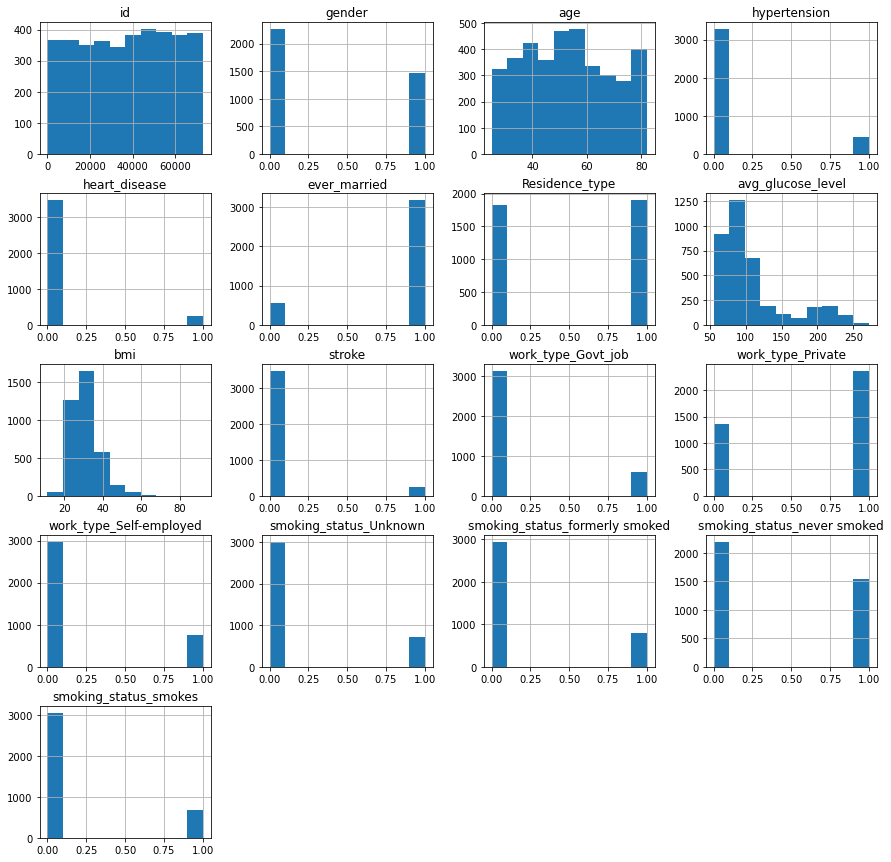

In [38]:
over_25_df.hist(figsize = (15,15))
plt.show()

**Using Standard Scalar to standardize data**

One option to check model performance versus normalized data

In [39]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
col_to_scale = ["age", "avg_glucose_level", "bmi"]
scaled_stroke_df = over_25_df.copy()

for x in col_to_scale:
   scaled_stroke_df[x] = scalar.fit_transform(np.array(scaled_stroke_df[x]).reshape(-1, 1))

In [40]:
scaled_stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.874738,0,1,1,1,2.464581,0.819354,1,0,1,0,0,1,0,0
1,51676,0,0.499979,0,0,1,0,1.918619,0.342896,1,0,0,1,0,0,1,0
2,31112,1,1.686716,0,1,1,0,-0.066679,0.244801,1,0,1,0,0,0,1,0
3,60182,0,-0.249538,0,0,1,1,1.279876,0.511058,1,0,1,0,0,0,0,1
4,1665,0,1.624256,1,0,1,0,1.339462,-0.946345,1,0,0,1,0,0,1,0


In [41]:
scaled_stroke_df.to_csv('stroke_scaled_df.csv')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

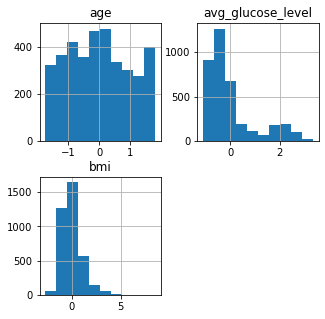

In [42]:
scaled_stroke_df[col_to_scale].hist(figsize=(5, 5))

**Using MinMaxScaler to normalize data**

One option for models to check against standardized data

In [43]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
col_to_norm = ["age", "avg_glucose_level", "bmi"]
norm_stroke_df = over_25_df.copy()

#norm_stroke_df = norm.fit_transform(over_25_df)

for x in col_to_norm:
   norm_stroke_df[x] = norm.fit_transform(np.array(norm_stroke_df[x]).reshape(-1, 1))


In [44]:
norm_stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.736842,0,1,1,1,0.801173,0.313507,1,0,1,0,0,1,0,0
1,51676,0,0.631579,0,0,1,0,0.678875,0.271375,1,0,0,1,0,0,1,0
2,31112,1,0.964912,0,1,1,0,0.234159,0.262701,1,0,1,0,0,0,1,0
3,60182,0,0.421053,0,0,1,1,0.535793,0.286245,1,0,1,0,0,0,0,1
4,1665,0,0.947368,1,0,1,0,0.549141,0.157373,1,0,0,1,0,0,1,0


In [45]:
norm_stroke_df.to_csv("stroke_norm_df.csv")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

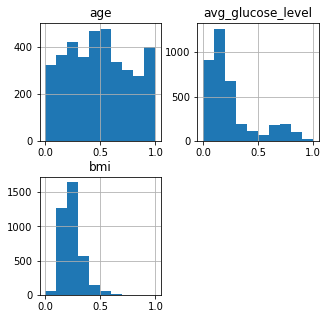

In [46]:
norm_stroke_df[col_to_norm].hist(figsize = (5, 5))

### Check features for correlation

In [47]:
import seaborn as sn

In [48]:
# create the correlation matrix
corrMatrix = norm_stroke_df.corr()

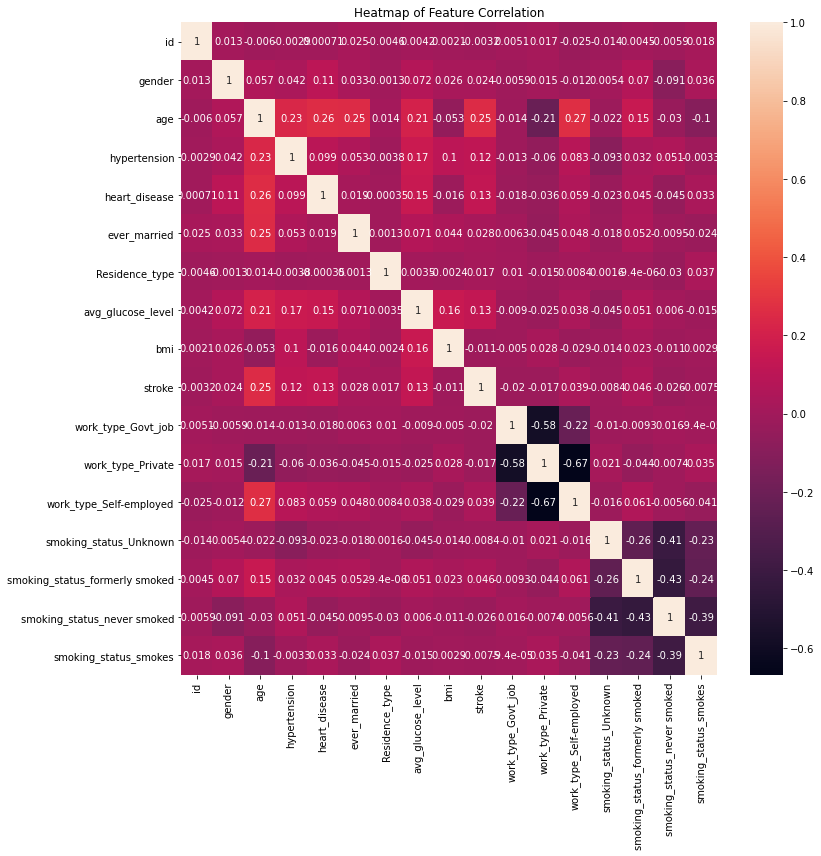

In [49]:
# use seaborn and matplotlib to create the visual representation

fig,ax=plt.subplots(figsize=(12,12))
sn.heatmap(corrMatrix, annot=True)
plt.title("Heatmap of Feature Correlation")
plt.savefig("Heatmap_corr.jpeg")
plt.show()

### Analyze feature important with Lasso regression

Used a few different alpha to tease out feature importance on normalized data.

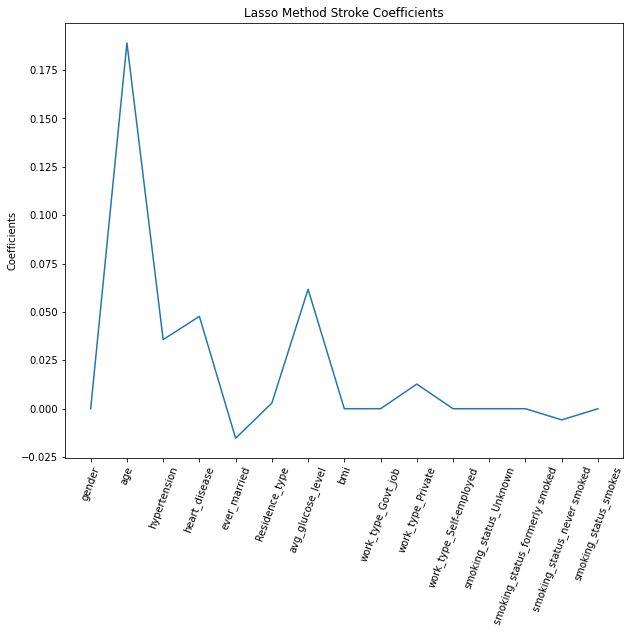

array([ 0.        ,  0.18905439,  0.03572438,  0.04772756, -0.0152649 ,
        0.00290912,  0.06174562, -0.        , -0.        ,  0.01273246,
       -0.        , -0.        ,  0.        , -0.00575893,  0.        ])

In [50]:
from sklearn.linear_model import Lasso
X = norm_stroke_df.drop(['id', 'stroke'], axis=1)
y = norm_stroke_df['stroke']

lasso = Lasso(alpha=0.001)
lasso_coef = lasso.fit(X,y).coef_
fig,ax=plt.subplots(figsize=(10,8))
_ = plt.plot(range(len(X.columns)), lasso_coef)
_ = plt.xticks(range(len(X.columns)), X.columns, rotation=70)
_ = plt.ylabel("Coefficients")
_ = plt.title("Lasso Method Stroke Coefficients")
plt.savefig("Lasso_Method_Stroke_Coefficients")
plt.show()
lasso_coef

In [64]:
features_coef = zip(X.columns, lasso_coef)
dict(features_coef)

{'gender': 0.0,
 'age': 0.18905438793942383,
 'hypertension': 0.03572437833823248,
 'heart_disease': 0.04772756399230873,
 'ever_married': -0.015264896755969943,
 'Residence_type': 0.0029091185957340806,
 'avg_glucose_level': 0.061745619443731026,
 'bmi': -0.0,
 'work_type_Govt_job': -0.0,
 'work_type_Private': 0.012732459981490593,
 'work_type_Self-employed': -0.0,
 'smoking_status_Unknown': -0.0,
 'smoking_status_formerly smoked': 0.0,
 'smoking_status_never smoked': -0.005758928441149643,
 'smoking_status_smokes': 0.0}

## Descriptive Data Plots

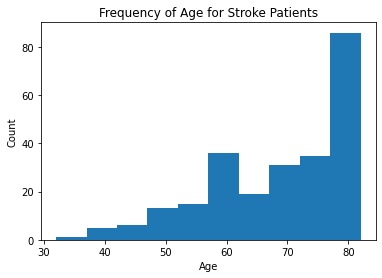

In [51]:
# Histogram of ages for stroke victims

plt.hist(just_stroke['age'])
plt.xlabel("Age")
plt.ylabel('Count')
plt.title("Frequency of Age for Stroke Patients")
plt.savefig("Freq_stroke_age.jpeg")
plt.show()

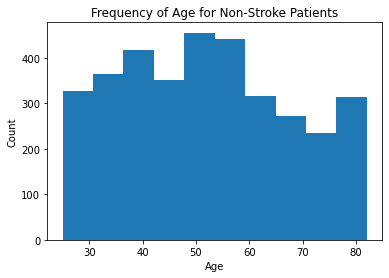

In [52]:
# Histogram of ages for non-stroke patients

plt.hist(over_25_df[over_25_df['stroke']==0]['age'])
plt.xlabel("Age")
plt.ylabel('Count')
plt.title("Frequency of Age for Non-Stroke Patients")
plt.savefig("Freq_NONstroke_age.jpeg")
plt.show()

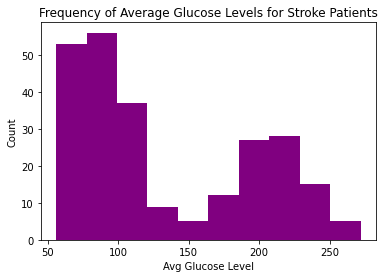

In [53]:
# Histogram of average glucose for stroke victims

plt.hist(just_stroke['avg_glucose_level'], color='purple')
plt.xlabel("Avg Glucose Level")
plt.ylabel('Count')
plt.title("Frequency of Average Glucose Levels for Stroke Patients")
plt.savefig("Freq_stroke_glucose.jpeg")
plt.show()


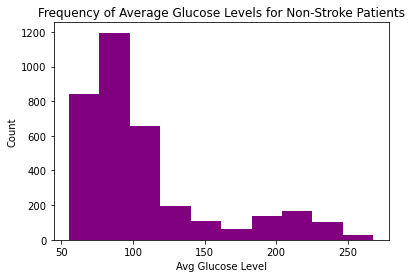

In [54]:
## Histogram of average glucose for non-stroke patients

plt.hist(over_25_df[over_25_df['stroke']==0]['avg_glucose_level'], color='purple')
plt.xlabel("Avg Glucose Level")
plt.ylabel('Count')
plt.title("Frequency of Average Glucose Levels for Non-Stroke Patients")
plt.savefig("Freq_NONstroke_glucose.jpeg")
plt.show()

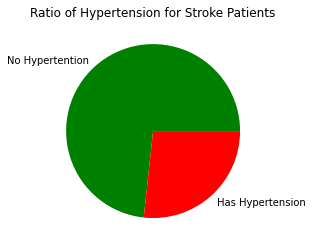

In [55]:
# Stroke patients and hypertention

labels = 'No Hypertention', 'Has Hypertension'
sizes = [just_stroke['hypertension'].value_counts()[0], just_stroke['hypertension'].value_counts()[1]]
plt.pie(sizes, labels=labels, colors=['g', 'r'])
plt.title("Ratio of Hypertension for Stroke Patients")
plt.savefig("Hypertension_stroke.jpeg")
plt.show()

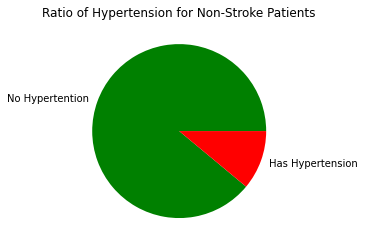

In [56]:
# Non-Stroke patients and hypertention

labels = 'No Hypertention', 'Has Hypertension'
num_hyper = over_25_df[over_25_df['stroke']==0]['hypertension'].value_counts()[1]
num_without = over_25_df[over_25_df['stroke']==0]['hypertension'].value_counts()[0]
sizes = [num_without, num_hyper]
plt.pie(sizes, labels=labels, colors=['g', 'r'])
plt.title("Ratio of Hypertension for Non-Stroke Patients")
plt.savefig("Hypertension_NONstroke.jpeg")
plt.show()

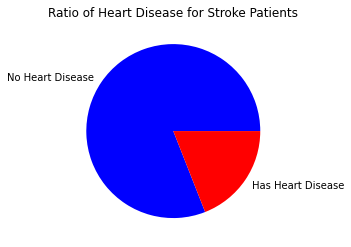

In [57]:
# Stroke patients and heart disease

labels = 'No Heart Disease', 'Has Heart Disease'
sizes = [just_stroke['heart_disease'].value_counts()[0], just_stroke['heart_disease'].value_counts()[1]]
plt.pie(sizes, labels=labels, colors=['b', 'r'])
plt.title("Ratio of Heart Disease for Stroke Patients")
plt.savefig("Heartdisease_stroke.jpeg")
plt.show()

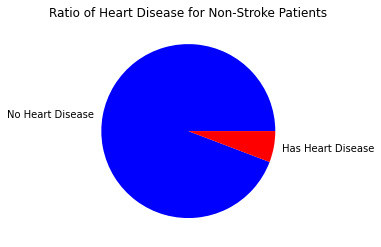

In [58]:
# Non-Stroke patients and heart disease

labels = 'No Heart Disease', 'Has Heart Disease'
num_heart = over_25_df[over_25_df['stroke']==0]['heart_disease'].value_counts()[1]
num_without = over_25_df[over_25_df['stroke']==0]['heart_disease'].value_counts()[0]
sizes = [num_without, num_heart]
plt.pie(sizes, labels=labels, colors=['b', 'r'])
plt.title("Ratio of Heart Disease for Non-Stroke Patients")
plt.savefig("Heartdisease_NONstroke.jpeg")
plt.show()